
# **Bayesian Network for Intrusion Detection Systems (IDS)**
### **A Probabilistic Approach to Cybersecurity**
---

## **Introduction**
In this notebook, we implement a **Bayesian Network** to analyze **Intrusion Detection Systems (IDS)**.
This probabilistic model helps us **assess the likelihood of a real cyberattack** given various factors.

Using **Bayes' Theorem**, we incorporate:
- **User Behavior**: Whether a user is normal, suspicious, or malicious.
- **Firewall Detection**: Whether an attack is independently detected by a firewall.
- **IDS Alert**: Whether the IDS triggers an alert.

---
## **Objective**
The key question we answer:
> **"If an IDS alert is triggered, what is the probability that it corresponds to a real attack?"**

To achieve this, we construct a **Bayesian Network** and compute **conditional probabilities** for different scenarios.



## **Bayesian Network Structure**
The Bayesian Network is structured as follows:

- **Attack (A)** → Influences IDS Alert (B) and Firewall Detection (D).
- **User Behavior (C)** → Influences IDS Alert (B).

The network can be represented as:

```
  Attack (A) → IDS Alert (B)
  Attack (A) → Firewall Detection (D)
  User Behavior (C) → IDS Alert (B)
```

This structure allows us to **combine multiple factors** when evaluating security alerts.


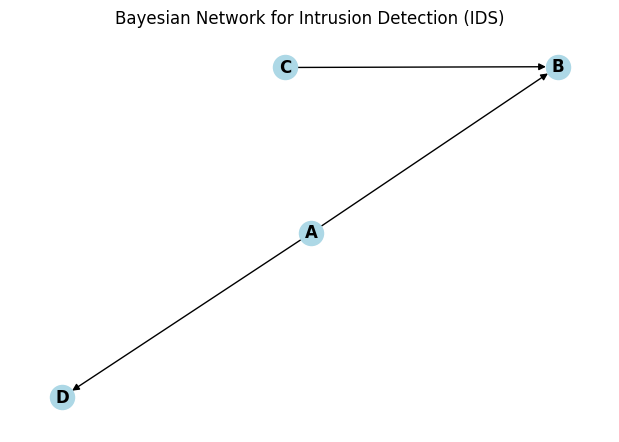

In [1]:

import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian Network Structure as a dictionary
bayesian_network = {
    'A': ['B', 'D'],  # Attack (A) influences IDS Alert (B) and Firewall Detection (D)
    'C': ['B']        # User Behavior (C) influences IDS Alert (B)
}

# Visualize the Bayesian Network Structure using NetworkX
plt.figure(figsize=(6, 4))
G = nx.DiGraph(bayesian_network)  # Convert dictionary into a directed graph
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="black", font_weight="bold")
plt.title("Bayesian Network for Intrusion Detection (IDS)")
plt.show()



## **Defining Conditional Probability Tables (CPTs)**
In a **Bayesian Network**, we need **probability distributions** to define how variables influence each other.

We define the **Conditional Probability Tables (CPTs)** for:
- **Attack Probability (A)**
- **IDS Alert Probability (B) given Attack (A) and User Behavior (C)**
- **User Behavior Probability (C)**
- **Firewall Detection Probability (D) given Attack (A)**


In [2]:

# Define Conditional Probability Tables (CPTs) as dictionaries

# Prior probability of an attack occurring (A)
CPT_A = {'A=1': 0.02, 'A=0': 0.98}  # 2% chance of an attack, 98% chance of no attack

# Probability of IDS Alert (B) given Attack (A) and User Behavior (C)
CPT_B = {
    ('A=1', 'C=0'): {'B=1': 0.90, 'B=0': 0.10},
    ('A=1', 'C=1'): {'B=1': 0.10, 'B=0': 0.90},
    ('A=1', 'C=2'): {'B=1': 0.05, 'B=0': 0.95},
    ('A=0', 'C=0'): {'B=1': 0.40, 'B=0': 0.60},
    ('A=0', 'C=1'): {'B=1': 0.80, 'B=0': 0.20},
    ('A=0', 'C=2'): {'B=1': 0.10, 'B=0': 0.90}
}

# Probability distribution of different user behaviors (C)
CPT_C = {'C=0': 0.85, 'C=1': 0.10, 'C=2': 0.05}  # 85% Normal Users, 10% Suspicious, 5% Malicious

# Probability of Firewall Detection (D) given an Attack (A)
CPT_D = {
    'A=1': {'D=1': 0.85, 'D=0': 0.15},  # Attack → 85% Detected, 15% Missed
    'A=0': {'D=1': 0.05, 'D=0': 0.95}   # No Attack → 5% False Positive, 95% No Detection
}



## **Bayesian Inference**
Now, we use **Bayes’ Theorem** to compute the probability of an attack given different evidence scenarios.

We define a function to calculate:

\$
P(A=1 | B, C, D) = \frac{P(A=1) P(B | A=1, C) P(D | A=1)}{P(A=1) P(B | A=1, C) P(D | A=1) + P(A=0) P(B | A=0, C) P(D | A=0)}
\$


In [5]:

# Function to Perform Bayesian Inference Manually
def bayesian_inference(evidence):
    """Compute probability of an Attack (A=1) given observed evidence using Bayes' Theorem."""
    
    # Convert evidence values to string format for dictionary lookups
    ev_B = f'B={evidence["B"]}'
    ev_D = f'D={evidence["D"]}'
    ev_C = f'C={evidence["C"]}'
    
    # Compute numerator: P(A=1) * P(B | A=1, C) * P(D | A=1)
    numerator = CPT_A['A=1'] * CPT_B[('A=1', ev_C)][ev_B] * CPT_D['A=1'][ev_D]
    
    # Compute denominator: Total probability considering both A=1 and A=0 cases
    denominator = (
        numerator +
        CPT_A['A=0'] * CPT_B[('A=0', ev_C)][ev_B] * CPT_D['A=0'][ev_D]
    )
    
    # Compute final conditional probability P(A=1 | B, C, D)
    return numerator / denominator

# Example scenario: IDS Alert (B=1), Firewall Detection (D=1), User Normal (C=0)
evidence = {'B': 1, 'D': 1, 'C': 0}
probability = bayesian_inference(evidence)
print(f"Probability of a Real Attack given IDS Alert & Firewall Detection: {probability:.4f}")


Probability of a Real Attack given IDS Alert & Firewall Detection: 0.4384
